In [7]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# Spotify EDA attributes

In [8]:
data = pd.read_csv("data/data.csv")
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [9]:
train, test = train_test_split(data, test_size = 0.15)

In [10]:
print('training size: {}, test size: {}'.format(len(train), len(test)))

training size: 1714, test size: 303


In [18]:
def getNegDfFor(featureName):
    return data[data['target'] == 0][featureName]

def getPosDfFor(featureName):
    return data[data['target'] == 1][featureName]


In [43]:
pos_tempo = getPosDfFor('tempo')
neg_tempo = getNegDfFor('tempo')
pos_dance = getPosDfFor('danceability')
neg_dance = getNegDfFor('danceability')
pos_duration = getPosDfFor('duration_ms')
neg_duration = getNegDfFor('duration_ms')
pos_loudness = getPosDfFor('loudness')
neg_loudness = getNegDfFor('loudness')
pos_speechiness = getPosDfFor('speechiness')
neg_speechiness = getNegDfFor('speechiness')
pos_valence = getPosDfFor('valence')
neg_valence = getNegDfFor('valence')
pos_energy = getPosDfFor('energy')
neg_energy = getNegDfFor('energy')
pos_acousticness = getPosDfFor('acousticness')
neg_acousticness = getNegDfFor('acousticness')
pos_key = getPosDfFor('key')
neg_key = getNegDfFor('key')
pos_instrumentalness = getPosDfFor('instrumentalness')
neg_instrumentalness = getNegDfFor('instrumentalness')


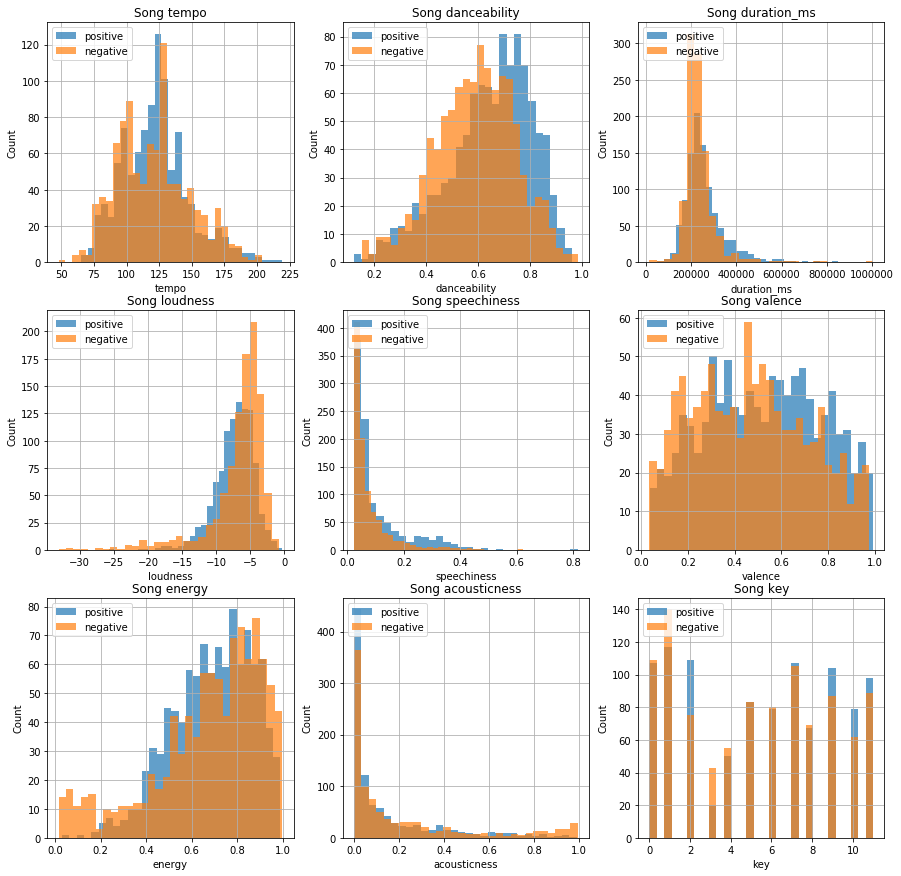

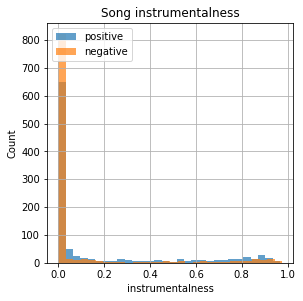

In [55]:
mainFig = plt.figure(figsize=(15, 15))

def drawHistFor(featureName, pos, posDf, negDf):
    ax_pos = mainFig.add_subplot(pos)
    ax_pos.set_xlabel(featureName)
    ax_pos.set_ylabel('Count')
    ax_pos.set_title('Song {}'.format(featureName))
    posDf.hist(alpha = 0.7, bins = 30, label = 'positive')
    negDf.hist(alpha = 0.7, bins = 30, label = 'negative')
    plt.legend(loc='upper left')
 
drawHistFor('tempo', 331, pos_tempo, neg_tempo)
drawHistFor('danceability', 332, pos_dance, neg_dance)
drawHistFor('duration_ms', 333, pos_duration, neg_duration)
drawHistFor('loudness', 334, pos_loudness, neg_loudness)
drawHistFor('speechiness', 335, pos_speechiness, neg_speechiness)
drawHistFor('valence', 336, pos_valence, neg_valence)
drawHistFor('energy', 337, pos_energy, neg_energy)
drawHistFor('acousticness', 338, pos_acousticness, neg_acousticness)
drawHistFor('key', 339, pos_key, neg_key)

mainFig = plt.figure(figsize=(15, 15))

drawHistFor('instrumentalness', 331, pos_instrumentalness, neg_instrumentalness)